<a href="https://colab.research.google.com/github/AUT-Student/CN-HW2/blob/main/CN_HW2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>In the name of God</b></center>

<b>Course</b>: Complex Network
<br>
<b>Description:</b> HomeWork 2 | Question 3
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Libraries

In [47]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


# Dataset

In [2]:
!gdown 17050A6f0ATXkkmaqB9aI7fxAa8zfHO5C

Downloading...
From: https://drive.google.com/uc?id=17050A6f0ATXkkmaqB9aI7fxAa8zfHO5C
To: /content/CN_HW2_dataset.zip
100% 282k/282k [00:00<00:00, 92.9MB/s]


In [3]:
!unzip /content/CN_HW2_dataset.zip

Archive:  /content/CN_HW2_dataset.zip
  inflating: airports.codes          
  inflating: airports.edges          
  inflating: bible.edges             
  inflating: bible.names             
  inflating: name_of_airports.csv    


In [2]:
graph = nx.Graph()

with open("/content/airports.edges") as file:
  for i, line in enumerate(file.readlines()):
    source, destination = line.split()[:2]
    graph.add_edge(source, destination)

In [17]:
def Laplace(graph):
  A = nx.adjacency_matrix(graph).todense()
  D = np.zeros((nx.number_of_nodes(graph), nx.number_of_nodes(graph)))

  i = 0
  for (node, val) in graph.degree():
    D[i,i] = val
    i += 1
  
  return D - A

In [18]:
laplace_graph = Laplace(graph)

In [23]:
values, vectors = np.linalg.eig(laplace_graph)

In [33]:
ss_vector = np.array([float(x) for x in vectors[-2]])

<ipython-input-33-e2c5cb249bbb>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  ss_vector = np.array([float(x) for x in vectors[-2]])


In [60]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(ss_vector.reshape(-1, 1))

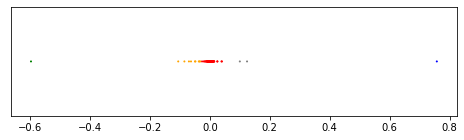

In [66]:
colors = ["red", "blue", "green", "orange", "gray"]

plt.title("Clusters")
plt.xlabel("")
plt.scatter(ss_vector, np.zeros(len(ss_vector)), s=1, c=[colors[label] for label in kmeans.labels_])
plt.yticks([])
plt.gcf().set_size_inches(8, 2)
plt.show()